In [1]:
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from itertools import count
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime
#from smartapi import SmartConnect
#import pyotp
import math
import time
import os
import openpyxl
from tqdm import tqdm
import plotly.graph_objects as go
import plotly.io as pio
import matplotlib.pyplot as plt
from statistics import quantiles
import seaborn as sns
import matplotlib.pyplot as plt
pio.renderers.default='browser'

In [2]:
df = pd.read_excel(r"C:\Users\ABC\Downloads\Nifty100_1y(1).xlsx", sheet_name=1)

In [3]:
df['CH_Percentage_Change'] = ((df['CH_CLOSING_PRICE'] - df['CH_PREVIOUS_CLS_PRICE']) / df['CH_PREVIOUS_CLS_PRICE']) * 100

In [4]:
print(df['CH_TIMESTAMP'].max())
print(df['CH_TIMESTAMP'].min())

2024-02-09
2023-02-13


In [5]:
# Assuming df is your DataFrame
grouped_dfs = []

# Group the DataFrame by the 'symbol' column
grouped = df.groupby('CH_SYMBOL')

# Iterate over the groups and create separate DataFrames
for symbol, group_df in grouped:
    grouped_dfs.append(group_df)

# Now, grouped_dfs contains separate DataFrames for each symbol


In [6]:
len(grouped_dfs)

101

In [7]:
for i, df_temp in enumerate(grouped_dfs):
    # Drop rows with duplicate dates
    grouped_dfs[i] = df_temp.drop_duplicates(subset=['CH_TIMESTAMP'])
    grouped_dfs[i]['percent_change']=((grouped_dfs[i]['CH_CLOSING_PRICE']-grouped_dfs[i]['CH_PREVIOUS_CLS_PRICE'])/grouped_dfs[i]['CH_PREVIOUS_CLS_PRICE'])*100

C:\Users\ABC\AppData\Local\Temp\ipykernel_14908\1982233160.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\ABC\AppData\Local\Temp\ipykernel_14908\1982233160.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\ABC\AppData\Local\Temp\ipykernel_14908\1982233160.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs

C:\Users\ABC\AppData\Local\Temp\ipykernel_14908\1982233160.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\ABC\AppData\Local\Temp\ipykernel_14908\1982233160.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\ABC\AppData\Local\Temp\ipykernel_14908\1982233160.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs

In [8]:
grouped_dfs[0]

,_id,CH_SYMBOL,CH_SERIES,CH_MARKET_TYPE,CH_TRADE_HIGH_PRICE,CH_TRADE_LOW_PRICE,CH_OPENING_PRICE,CH_CLOSING_PRICE,CH_LAST_TRADED_PRICE,CH_PREVIOUS_CLS_PRICE,...,updatedAt,__v,SLBMH_TOT_VAL,VWAP,mTIMESTAMP,CA,Stock_Name,Sector,CH_Percentage_Change,percent_change
0,65c613dd2ce7cc3ec077307b,ABB,EQ,N,4501.45,4412.70,4464.00,4489.45,4482.00,4450.40,...,2024-02-09T12:00:29.867Z,0,NaN,4461.90,09-Feb-2024,NaN,ABB India Ltd.,Capital Goods,0.877449,0.877449
1,65c4c25dc6253a0740166a9f,ABB,EQ,N,4610.00,4440.10,4610.00,4450.40,4452.00,4575.10,...,2024-02-08T12:00:29.679Z,0,NaN,4510.69,08-Feb-2024,NaN,ABB India Ltd.,Capital Goods,-2.725623,-2.725623
2,65c370de9e2fb5b3bd870f36,ABB,EQ,N,4629.30,4434.50,4434.55,4575.10,4565.00,4403.00,...,2024-02-07T12:00:30.124Z,0,NaN,4554.35,07-Feb-2024,NaN,ABB India Ltd.,Capital Goods,3.908699,3.908699
4,65c21f84982ac8e7199ce783,ABB,EQ,N,4423.60,4362.05,4378.00,4403.00,4410.00,4368.20,...,2024-02-06T12:01:08.635Z,0,NaN,4401.44,06-Feb-2024,NaN,ABB India Ltd.,Capital Goods,0.796667,0.796667
5,65c0cf2cab72646911a03336,ABB,EQ,N,4538.50,4343.75,4500.00,4368.20,4358.00,4480.45,...,2024-02-05T12:06:04.263Z,0,NaN,4428.92,05-Feb-2024,NaN,ABB India Ltd.,Capital Goods,-2.505329,-2.505329
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248,642835da7ae9d0000711663b,ABB,EQ,N,3238.00,3121.20,3192.00,3136.15,3140.00,3188.40,...,2023-04-01T13:47:06.435Z,0,NaN,3185.12,17-Feb-2023,NaN,ABB India Ltd.,Capital Goods,-1.638753,-1.638753
249,63ee1ae0e9845a00077c1c07,ABB,EQ,N,3205.00,3135.00,3165.35,3188.40,3180.00,3149.60,...,2023-02-16T12:00:32.401Z,0,NaN,3173.52,16-Feb-2023,NaN,ABB India Ltd.,Capital Goods,1.231902,1.231902
250,63ecc95bf3c7a10007961901,ABB,EQ,N,3190.00,3074.45,3079.90,3149.60,3148.00,3077.30,...,2023-02-15T12:00:27.890Z,0,NaN,3149.56,15-Feb-2023,NaN,ABB India Ltd.,Capital Goods,2.349462,2.349462
251,63eb77e02dd7bc0006b22e86,ABB,EQ,N,3171.00,3022.65,3094.00,3077.30,3083.95,3079.65,...,2023-02-14T12:00:32.686Z,0,NaN,3118.41,14-Feb-2023,NaN,ABB India Ltd.,Capital Goods,-0.076307,-0.076307


In [9]:
df_nifty = pd.read_excel(r"C:\Users\ABC\Downloads\NIFTY 50_Historical_1y.xlsx")
df_nifty['Date'] = pd.to_datetime(df_nifty['Date'])

# Filter the DataFrame to keep rows with date between 01-01-2023 and 01-01-2024
start_date = pd.to_datetime('2023-02-13')
end_date = pd.to_datetime('2024-02-09')
df_nifty = df_nifty[(df_nifty['Date'] >= start_date) & (df_nifty['Date'] <= end_date)]

In [10]:
df_nifty

,Index Name,Date,Open,High,Low,Close,%Change
0,NIFTY 50,2024-02-09,21727.00,21804.45,21629.90,21782.50,0.297220
1,NIFTY 50,2024-02-08,22009.65,22011.05,21665.30,21717.95,-0.969198
2,NIFTY 50,2024-02-07,22045.05,22053.30,21860.15,21930.50,0.005016
3,NIFTY 50,2024-02-06,21825.20,21951.40,21737.55,21929.40,0.724335
4,NIFTY 50,2024-02-05,21921.05,21964.30,21726.95,21771.70,-0.375678
...,...,...,...,...,...,...,...
241,NIFTY 50,2023-02-17,17974.85,18034.25,17884.60,17944.20,-0.508155
242,NIFTY 50,2023-02-16,18094.75,18134.75,18000.65,18035.85,0.111013
243,NIFTY 50,2023-02-15,17896.60,18034.10,17853.80,18015.85,0.479647
244,NIFTY 50,2023-02-14,17840.35,17954.55,17800.05,17929.85,0.894440


In [11]:
df_nifty['Date'] = pd.to_datetime(df_nifty['Date'])

# Filter the DataFrame to keep rows with date between 01-01-2023 and 01-01-2024
start_date = pd.to_datetime('2023-02-13')
end_date = pd.to_datetime('2024-02-09')
df_nifty = df_nifty[(df_nifty['Date'] >= start_date) & (df_nifty['Date'] <= end_date)]

In [12]:
df_nifty

,Index Name,Date,Open,High,Low,Close,%Change
0,NIFTY 50,2024-02-09,21727.00,21804.45,21629.90,21782.50,0.297220
1,NIFTY 50,2024-02-08,22009.65,22011.05,21665.30,21717.95,-0.969198
2,NIFTY 50,2024-02-07,22045.05,22053.30,21860.15,21930.50,0.005016
3,NIFTY 50,2024-02-06,21825.20,21951.40,21737.55,21929.40,0.724335
4,NIFTY 50,2024-02-05,21921.05,21964.30,21726.95,21771.70,-0.375678
...,...,...,...,...,...,...,...
241,NIFTY 50,2023-02-17,17974.85,18034.25,17884.60,17944.20,-0.508155
242,NIFTY 50,2023-02-16,18094.75,18134.75,18000.65,18035.85,0.111013
243,NIFTY 50,2023-02-15,17896.60,18034.10,17853.80,18015.85,0.479647
244,NIFTY 50,2023-02-14,17840.35,17954.55,17800.05,17929.85,0.894440


In [13]:
grouped_dfs.append(df_nifty)


In [14]:
len(grouped_dfs)

102

In [15]:
df_temp=grouped_dfs[25]
df_temp

,_id,CH_SYMBOL,CH_SERIES,CH_MARKET_TYPE,CH_TRADE_HIGH_PRICE,CH_TRADE_LOW_PRICE,CH_OPENING_PRICE,CH_CLOSING_PRICE,CH_LAST_TRADED_PRICE,CH_PREVIOUS_CLS_PRICE,...,updatedAt,__v,SLBMH_TOT_VAL,VWAP,mTIMESTAMP,CA,Stock_Name,Sector,CH_Percentage_Change,percent_change
6578,65c613de2ce7cc3ec0773428,COALINDIA,EQ,N,463.80,435.65,462.20,456.20,454.75,459.20,...,2024-02-09T12:00:30.966Z,0,NaN,448.86,09-Feb-2024,NaN,Coal India Ltd.,Oil Gas & Consumable Fuels,-0.653310,-0.653310
6579,65c4c25fc6253a0740166e69,COALINDIA,EQ,N,468.60,450.00,454.80,459.20,461.00,452.65,...,2024-02-08T12:00:31.405Z,0,NaN,459.95,08-Feb-2024,NaN,Coal India Ltd.,Oil Gas & Consumable Fuels,1.447034,1.447034
6580,65c370de9e2fb5b3bd8712f6,COALINDIA,EQ,N,460.55,447.80,454.00,452.65,454.35,448.65,...,2024-02-07T12:00:30.865Z,0,NaN,454.69,07-Feb-2024,NaN,Coal India Ltd.,Oil Gas & Consumable Fuels,0.891564,0.891564
6582,65c21f85982ac8e7199ceb4b,COALINDIA,EQ,N,451.00,437.25,444.80,448.65,447.20,440.25,...,2024-02-06T12:01:09.872Z,0,NaN,442.93,06-Feb-2024,NaN,Coal India Ltd.,Oil Gas & Consumable Fuels,1.908007,1.908007
6583,65c0cf2dab72646911a03710,COALINDIA,EQ,N,450.00,417.10,423.25,440.25,441.30,419.80,...,2024-02-05T12:06:05.217Z,0,NaN,436.95,05-Feb-2024,NaN,Coal India Ltd.,Oil Gas & Consumable Fuels,4.871367,4.871367
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6826,642835db7ae9d000071169ed,COALINDIA,EQ,N,218.25,214.20,214.85,217.50,217.65,215.45,...,2023-04-01T13:47:07.299Z,0,NaN,217.26,17-Feb-2023,NaN,Coal India Ltd.,Oil Gas & Consumable Fuels,0.951497,0.951497
6827,63ee1ae1e9845a00077c1fd0,COALINDIA,EQ,N,216.50,213.10,213.50,215.45,215.30,212.90,...,2023-02-16T12:00:33.237Z,0,NaN,214.82,16-Feb-2023,NaN,Coal India Ltd.,Oil Gas & Consumable Fuels,1.197745,1.197745
6828,63ecc95cf3c7a10007961cc3,COALINDIA,EQ,N,213.80,210.30,211.00,212.90,213.50,211.75,...,2023-02-15T12:00:28.763Z,0,NaN,211.90,15-Feb-2023,NaN,Coal India Ltd.,Oil Gas & Consumable Fuels,0.543093,0.543093
6829,63eb77e12dd7bc0006b232db,COALINDIA,EQ,N,214.30,211.10,213.05,211.75,211.60,213.05,...,2023-02-14T12:00:33.547Z,0,NaN,212.58,14-Feb-2023,NaN,Coal India Ltd.,Oil Gas & Consumable Fuels,-0.610185,-0.610185


In [16]:
grouped_dfs[101] = grouped_dfs[101].iloc[::-1]

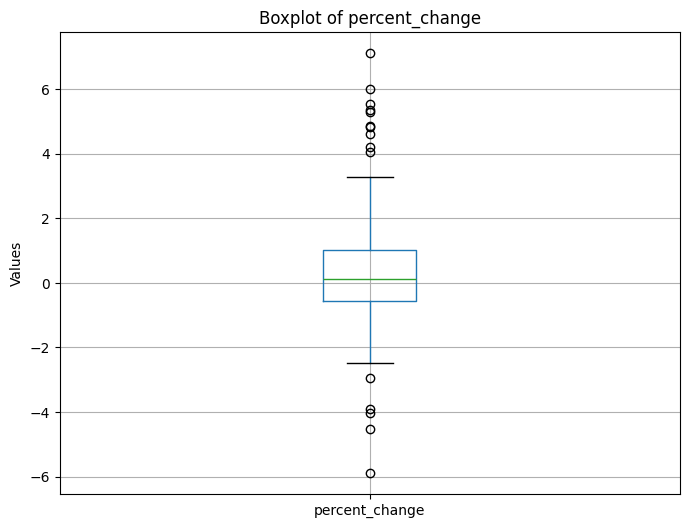

In [17]:
plt.figure(figsize=(8, 6))  # Adjust the figure size if needed
df_temp.boxplot(column='percent_change')

# Add labels and title

plt.ylabel('Values')
plt.title('Boxplot of percent_change')

# Show the plot
plt.show()

In [18]:
df1=grouped_dfs[6]
df2=grouped_dfs[7]

In [19]:
def z_score_normalization(series):
    return (series - series.mean()) / series.std()

# Apply Z-score normalization to the 'percent_change' column in df1 and df2
df1['percent_change_normalized'] = z_score_normalization(df1['percent_change'])
df2['percent_change_normalized'] = z_score_normalization(df2['percent_change'])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


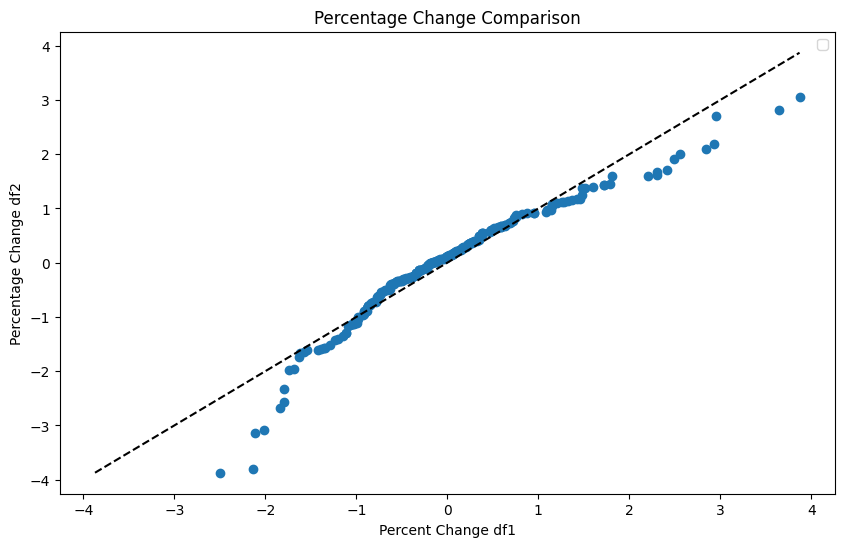

In [20]:
plt.figure(figsize=(10, 6))  # Set the figure size

percent_normalise_df1=np.sort(df1['percent_change_normalized'])
percent_normalise_df2=np.sort(df2['percent_change_normalized'])


# Plot the percentage change for df1
plt.scatter(percent_normalise_df1,percent_normalise_df2)



# Add labels and title
plt.xlabel('Percent Change df1')
plt.ylabel('Percentage Change df2')
plt.title('Percentage Change Comparison')
plt.legend()  # Show legend

min_val = min(df1['percent_change_normalized'].min(), df2['percent_change_normalized'].min())
max_val = max(df1['percent_change_normalized'].max(), df2['percent_change_normalized'].max())

# Plot the 45-degree line
plt.plot([min_val, max_val], [min_val, max_val], linestyle='--', color='black', label='45 Degree Line')


# Show the plot
plt.show()

In [21]:
df1['percent_change_normalized'].mean()

1.805240690447409e-17

In [22]:
df1['percent_change_normalized'].std()

1.0000000000000002

In [23]:
x1 = np.random.normal(loc=10, scale=6, size=246)
x2=np.random.normal(loc=20, scale=10, size=246)
x1=z_score_normalization(x1)
x2=z_score_normalization(x2)


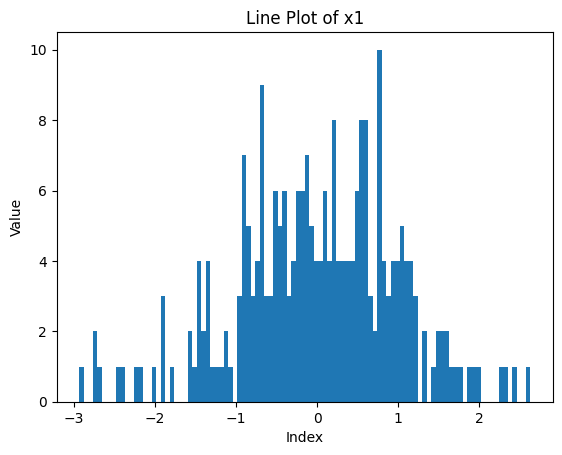

In [24]:
plt.hist(x1,bins=100)

# Add labels and title
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Line Plot of x1')

# Show the plot
plt.show()

In [25]:
x1= np.sort(x1)
x2=np.sort(x2)

In [26]:
print(x1.mean())

5.77677020943171e-17


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


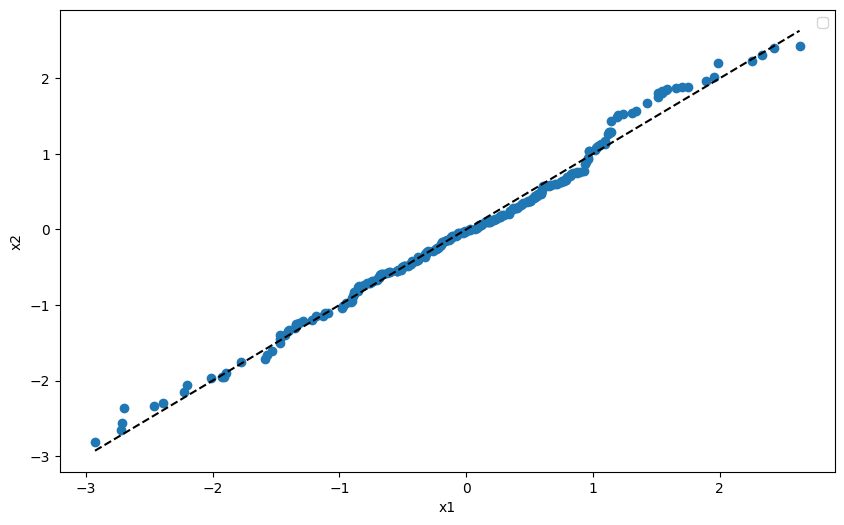

In [27]:
plt.figure(figsize=(10, 6))  # Set the figure size

# Plot the percentage change for df1
plt.scatter(x1,x2)
# Add labels and title
plt.xlabel('x1')
plt.ylabel('x2')

plt.legend()  # Show legend

min_val = min(x1.min(), x2.min())
max_val = max(x1.max(), x2.max())

# Plot the 45-degree line
plt.plot([min_val, max_val], [min_val, max_val], linestyle='--', color='black', label='45 Degree Line')


# Show the plot
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


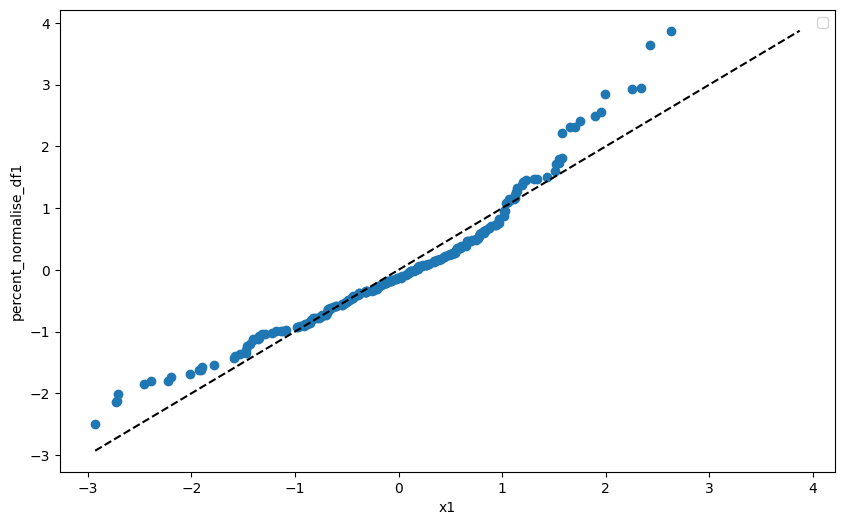

In [28]:
plt.figure(figsize=(10, 6))  # Set the figure size

# Plot the percentage change for df1
plt.scatter(x1,percent_normalise_df1)

# Add labels and title
plt.xlabel('x1')
plt.ylabel('percent_normalise_df1')

plt.legend()  # Show legend

min_val = min(x1.min(), percent_normalise_df1.min())
max_val = max(x1.max(), percent_normalise_df1.max())

# Plot the 45-degree line
plt.plot([min_val, max_val], [min_val, max_val], linestyle='--', color='black', label='45 Degree Line')


# Show the plot
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.0
0.997965409896352


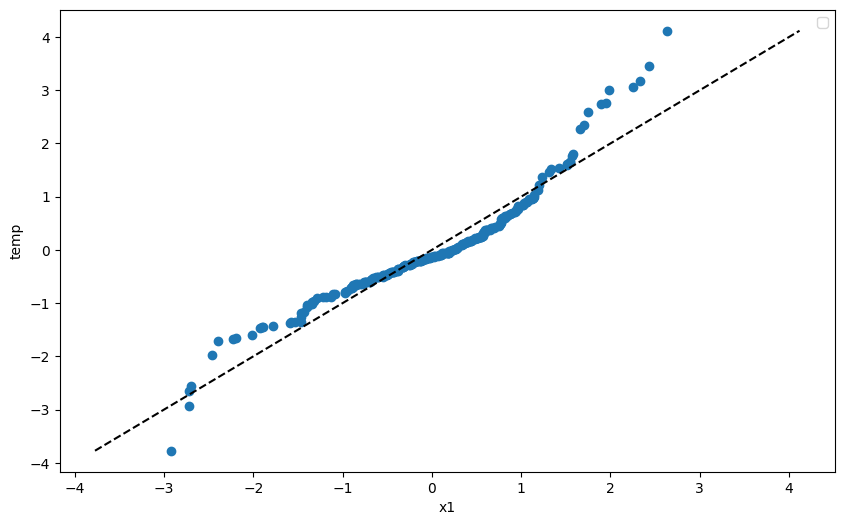

In [29]:
df_temp=grouped_dfs[25]


# Apply Z-score normalization to the 'percent_change' column in df1 and df2
df_temp['percent_change_normalized'] = z_score_normalization(df_temp['percent_change'])

temp=np.sort(df_temp['percent_change_normalized'])
print(temp.mean())
print(temp.std())
plt.figure(figsize=(10, 6))  # Set the figure size

# Plot the percentage change for df1
plt.scatter(x1,temp)



# Add labels and title
plt.xlabel('x1')
plt.ylabel('temp')

plt.legend()  # Show legend

min_val = min(x1.min(), temp.min())
max_val = max(x1.max(), temp.max())

# Plot the 45-degree line
plt.plot([min_val, max_val], [min_val, max_val], linestyle='--', color='black', label='45 Degree Line')


# Show the plot
plt.show()


In [30]:
grouped_dfs = []

# Group the DataFrame by the 'symbol' column
grouped = df.groupby('Sector')

# Iterate over the groups and create separate DataFrames
for symbol, group_df in grouped:
    grouped_dfs.append(group_df)

In [31]:
grouped_by_company_dfs = []

# Iterate over each DataFrame in grouped_dfs
for sector_df in grouped_dfs:
    # Group the DataFrame by the 'company' column
    grouped_by_company = sector_df.groupby('CH_SYMBOL')
    
    # Create an empty list to store the DataFrames for each company
    company_dfs_list = []
    
    # Iterate over each group and append the DataFrame to the list
    for company, group_df in grouped_by_company:
        company_dfs_list.append(group_df)
    
    # Append the list of DataFrames grouped by company to the final list
    grouped_by_company_dfs.append(company_dfs_list)


### Metals & Mining 

In [32]:
metal1 = grouped_by_company_dfs[11]

In [33]:
metal1

[                          _id CH_SYMBOL CH_SERIES CH_MARKET_TYPE  \
 506  65c613de2ce7cc3ec07731bb  ADANIENT        EQ              N   
 507  65c4c25ec6253a0740166be0  ADANIENT        EQ              N   
 508  65c370de9e2fb5b3bd871070  ADANIENT        EQ              N   
 509  65c370de9e2fb5b3bd871070  ADANIENT        EQ              N   
 510  65c21f85982ac8e7199ce8c8  ADANIENT        EQ              N   
 ..                        ...       ...       ...            ...   
 754  642835da7ae9d00007116780  ADANIENT        EQ              N   
 755  63ee1ae0e9845a00077c1d4a  ADANIENT        EQ              N   
 756  63ecc95cf3c7a10007961a54  ADANIENT        EQ              N   
 757  63eb77e02dd7bc0006b2300d  ADANIENT        EQ              N   
 758  63ea26637f00b10007473475  ADANIENT        EQ              N   
 
      CH_TRADE_HIGH_PRICE  CH_TRADE_LOW_PRICE  CH_OPENING_PRICE  \
 506              3224.95             3121.20           3184.45   
 507              3245.60           

In [34]:
for df_temp in i:
    # Add a new column 'percentage_change' with the percentage change calculation
    df_temp['percentage_change'] = (df_temp['CH_CLOSING_PRICE']-df_temp['CH_PREVIOUS_CLS_PRICE'])/df_temp['CH_PREVIOUS_CLS_PRICE']*100
    df_temp['percentage_change'] =z_score_normalization(df_temp['percentage_change'])
    print(len(df_temp))
df_temp

TypeError: 'int' object is not iterable

In [ ]:
transposed_dfs = [df['percentage_change'].reset_index(drop=True).rename(i) for i, df in enumerate(metal1)]
merged_df = pd.concat(transposed_dfs, axis=1)

In [ ]:
Metalxmining_sector_dfs = next((sector for sector in grouped_by_company_dfs if sector[0]['Sector'].iloc[0] == 'Metal and mining'), None)

In [ ]:
correlation_matrix = merged_df.corr()

# Assign column names based on 'CH_SYMBOL' values
# column_names = [f"{company_df['CH_SYMBOL'].iloc[0]}_percentage_change" for company_df in Metalxmining_sector_dfs]
# correlation_matrix.columns = column_names
# correlation_matrix.index = column_names

# Plot correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()
